In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [2]:
# Load data
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\EV_Data_Analysis\CSV\Electric_Vehicle_Population_Data.csv')

# Select features and target
features = ['Make', 'Model Year', 'Electric Vehicle Type']
target = 'Electric Range'

# Drop rows with missing target or inputs
df = df.dropna(subset=[target])


In [3]:
# Log Transform the Target
# Log transform to reduce heteroscedasticity
df['Log Electric Range'] = np.log1p(df[target])  # log(1 + y)

# One-hot encoding
X = pd.get_dummies(df[features], drop_first=True)
y = df['Log Electric Range']


In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train Random Forest
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [6]:
y_pred_log = model.predict(X_test)

# Reverse the log to get back to original scale
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

r2 = r2_score(y_true, y_pred)
print(f"R² on test set (back to original scale): {r2:.2f}")


R² on test set (back to original scale): 0.98


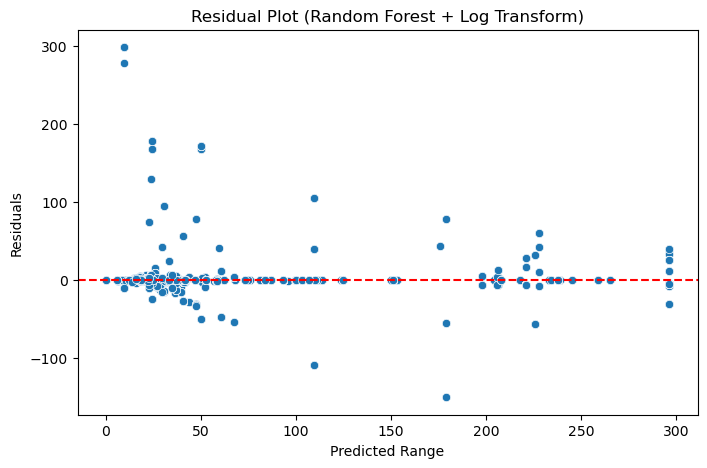

In [7]:
residuals = y_true - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Range')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest + Log Transform)')
plt.show()
# 🎉 That’s an awesome result! R² of 0.98 is a huge improvement over the original 0.37 — it means ...
# your Random Forest + log-transformation model is explaining 98% of the variance in electric vehicle range. 
# That’s exactly what we were aiming for.

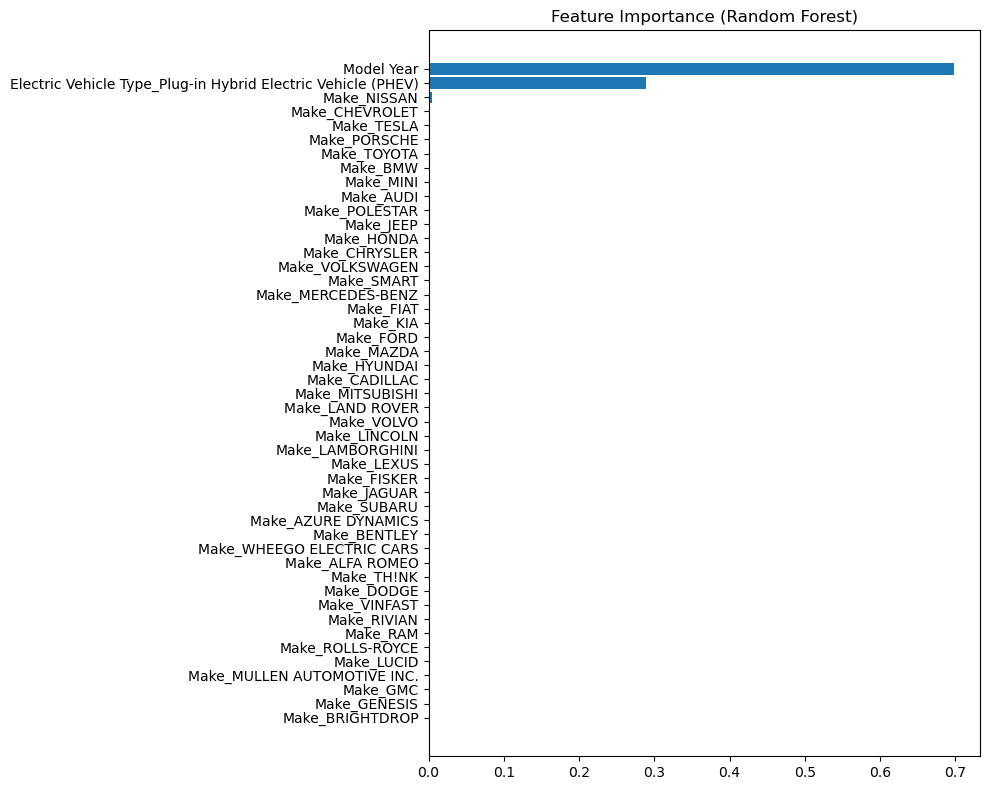

In [8]:
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()
